In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

colores_personalizados = ["red", "blue", "green", "orange", "purple", "yellow"]

In [199]:
df = pd.read_csv("simpsons_episodes.csv")

In [200]:
df.head(2)

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      600 non-null    int64  
 1   image_url               596 non-null    object 
 2   imdb_rating             597 non-null    float64
 3   imdb_votes              597 non-null    float64
 4   number_in_season        600 non-null    int64  
 5   number_in_series        600 non-null    int64  
 6   original_air_date       600 non-null    object 
 7   original_air_year       600 non-null    int64  
 8   production_code         600 non-null    object 
 9   season                  600 non-null    int64  
 10  title                   600 non-null    object 
 11  us_viewers_in_millions  594 non-null    float64
 12  video_url               596 non-null    object 
 13  views                   596 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory 

In [202]:
df[df['imdb_rating'].isna()]

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
234,598,NaN,NaN,NaN,2,598,2016-10-02,2016,VABF18,28,"Friends and Family""[203]",NaN,NaN,NaN
235,599,NaN,NaN,NaN,3,599,2016-10-09,2016,VABF17,28,"The Town""[205]",NaN,NaN,NaN
236,600,NaN,NaN,NaN,4,600,2016-10-16,2016,VABF16,28,"Treehouse of Horror XXVII""[207]",NaN,NaN,NaN


In [203]:
df = df.rename(columns={"us_viewers_in_millions":'viewers'})

In [204]:
df[df['viewers'].isna() & (df['season']==8)]

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,viewers,video_url,views
59,160,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1005.0,7,160,1996-12-15,1996,4F01,8,Lisa's Date with Density,NaN,http://www.simpsonsworld.com/video/306394691862,60912.0
65,173,http://static-media.fxx.com/img/FX_Networks_-_...,7.7,913.0,20,173,1997-04-13,1997,4F16,8,The Canine Mutiny,NaN,http://www.simpsonsworld.com/video/436370499586,54155.0
320,161,http://static-media.fxx.com/img/FX_Networks_-_...,8.8,1268.0,8,161,1996-12-29,1996,4F07,8,Hurricane Neddy,NaN,http://www.simpsonsworld.com/video/436250179702,66281.0


In [205]:
df['views']

0      50816.0
1      62561.0
2      59575.0
3      64959.0
4      50691.0
        ...   
595    45226.0
596    44818.0
597    39687.0
598    39292.0
599    55742.0
Name: views, Length: 600, dtype: float64

In [206]:
correlacion = df[['imdb_rating', 'imdb_votes', 'viewers', 'views']][df['season']==8].corr('pearson')

Viendo que no tiene una correlación significativa, voy a rellenar los datos faltantes con la media de visualizaciones

<Axes: >

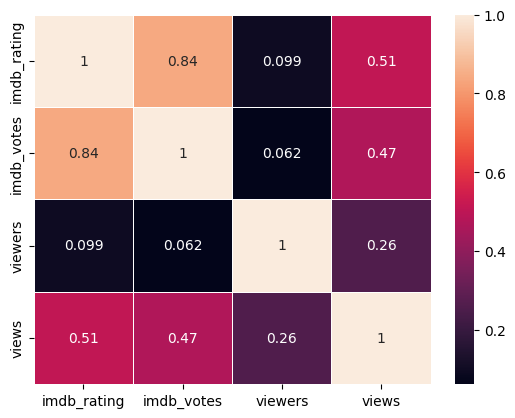

In [207]:
sns.heatmap(correlacion, annot=True, linewidths=0.5, color=colores_personalizados)

In [208]:
df[['imdb_rating', 'imdb_votes', 'viewers', 'views']][df['season']==8]

,imdb_rating,imdb_votes,viewers,views
58,7.7,1079.0,12.6,55497.0
59,7.8,1005.0,NaN,60912.0
60,9.0,1793.0,20.9,69555.0
61,7.8,998.0,14.0,71813.0
62,7.9,1079.0,15.5,58581.0
63,8.9,1666.0,15.3,63355.0
64,8.7,1330.0,14.6,83561.0
65,7.7,913.0,NaN,54155.0
66,8.0,973.0,16.9,59088.0
67,7.8,967.0,12.7,59196.0


In [209]:
media_temorada_8 = df['viewers'][df['season']==8].mean()

In [210]:
df['viewers'][df['season']==8] = df['viewers'][df['season']==8].fillna(media_temorada_8)

In [211]:
df_limpio = df[df['season']!=28]

In [212]:
df_limpio = df_limpio.drop(columns=['image_url', 'production_code', 'video_url', 'number_in_series'])

In [213]:
df_limpio['original_air_date'] = pd.to_datetime(df_limpio['original_air_date'], format="%Y-%m-%d")

In [214]:
df_limpio['original_air_date'] = df_limpio['original_air_date'].dt.strftime('%d/%m/%Y')

In [215]:
df_limpio['original_air_date'] = pd.to_datetime(df_limpio['original_air_date'])

Ya tenemos el df_limpio y vamos a visualizar las variables:

In [216]:
media_por_temp = df_limpio.groupby("season")[["views", "imdb_rating", "imdb_votes", "viewers"]].mean().sort_values(by="season")

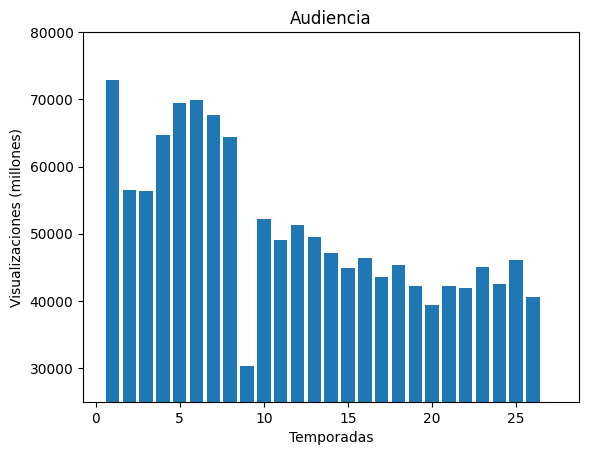

In [274]:
fig, ax = plt.subplots()
ax.bar(media_por_temp.index, media_por_temp.views);
ax.set(ylim=(25000, 80000))

# Añado etiquetas a los ejes
ax.set_xlabel("Temporadas")
ax.set_ylabel("Visualizaciones (millones)")
#ax.legend()

# Añado un título
ax.set_title("Audiencia")

plt.show()


La siguiente variable la dejo de utilizar ya que no es significativa; pues sólo hace referencia a los espectadores de USA. El resto, son generales de IMDb

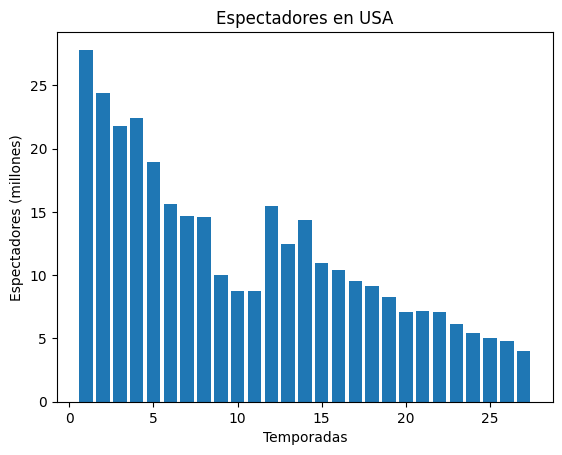

In [218]:
fig, ax = plt.subplots()
ax.bar(media_por_temp.index, media_por_temp.viewers);

ax.set_xlabel("Temporadas")
ax.set_ylabel("Espectadores (millones)")

ax.set_title("Espectadores en USA")

plt.show()

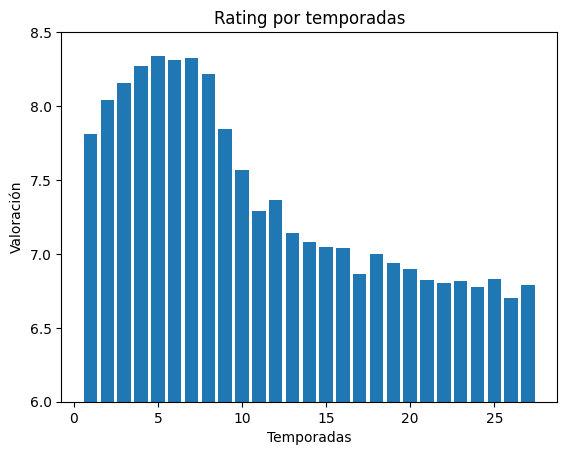

In [219]:
fig, ax = plt.subplots()
ax.bar(media_por_temp.index, media_por_temp.imdb_rating);
ax.set(ylim=(6, 8.5))

ax.set_xlabel("Temporadas")
ax.set_ylabel("Valoración")

ax.set_title("Rating por temporadas")

plt.show()

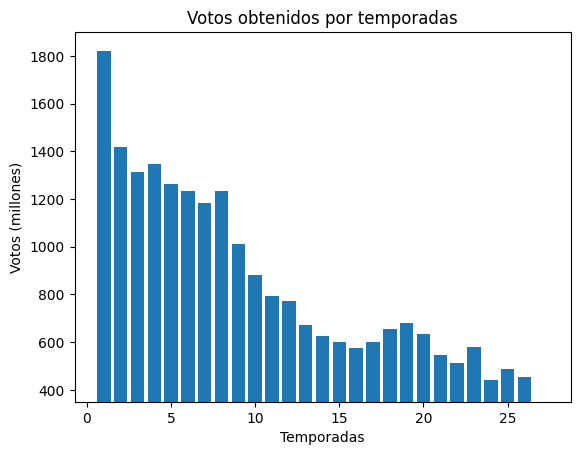

In [220]:
fig, ax = plt.subplots()
ax.bar(media_por_temp.index, media_por_temp.imdb_votes);
ax.set(ylim=(350, 1900))

ax.set_xlabel("Temporadas")
ax.set_ylabel("Votos (millones)") 

ax.set_title("Votos obtenidos por temporadas")

plt.show()

Con la información que nos aportan los gráficos, podemos determinar claramente que las primeras 8 temporadas son las mejores, tanto en número de votos, en rating, y en visualizaciones.

Vemos una caída significativa en la temporada 9. Analizaremos este hecho más adelante

A continuación, calcularemos, agrupando por años, la media de las variables, para después dibujar las gráficas y poder ver de forma más clara
cómo la serie ha ido perdiendo fuelle a lo largo del tiempo.

In [221]:
mean_anuales = df_limpio.groupby("original_air_year")[["views", "imdb_rating", "imdb_votes"]].mean()

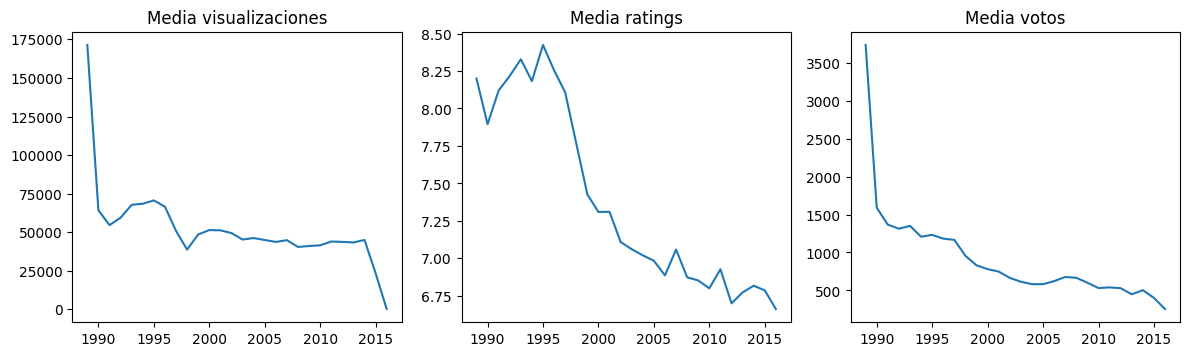

In [222]:
# Creo una figura y tres subgráficos. 
plt.figure(figsize=(12, 10))

plt.subplot(337)
plt.plot(mean_anuales.index, mean_anuales['views'])
plt.title('Media visualizaciones')

plt.subplot(338)  
plt.plot(mean_anuales.index, mean_anuales['imdb_rating'])
plt.title('Media ratings')

plt.subplot(339)  
plt.plot(mean_anuales.index, mean_anuales['imdb_votes'])
plt.title('Media votos')

# Ajusto el espaciado entre los subgráficos
plt.tight_layout()

A través de estas gráficas podemos observar que hubo un gran declive en audiencia sobre el año 1998-1999. Algunas de las razones que pudieron influir son:

<br>* Curiosamente coincidió con que varios de los guionistas principales se fueron de la serie. Pero también, con el hecho de que cada vez había más variedad en cuanto a series y programas. Algunas de las más existosas que coincidieron en el tiempo fueron Futurama, South Park y Padre de Familia, serie por la que apostó Fox en 1999 y que tuvo una gran acogida por parte del público.
<br>* Por otro lado, parte de sus seguidores atribuyen esta pérdida de audiencia simplemente a la falta de calidad e ingenio 
a la que nos tenía acostumbrada la serie.
<br>* También podríamos afirmar que la media de visualizaciones se mantiene a partir del bajón de la temporada 9, 
en la que los ratings tienen algún repunte y los votos caen.

<br>No obstante, los Simpsons, en las temporadas siguientes a la 9, siguen teniendo un público fiel. Analicemos ahora estas temporadas y veamos 
si realmente son malas o no.

In [223]:
peores_temp = df_limpio[(df_limpio['season'] >= 9)]

In [224]:
peores_temp

,id,imdb_rating,imdb_votes,number_in_season,original_air_date,original_air_year,season,title,viewers,views
68,180,7.4,1158.0,2,1997-09-28,1997,9,The Principal and the Pauper,14.90,48414.0
69,184,7.7,925.0,6,1997-11-09,1997,9,Bart Star,10.60,31033.0
70,186,8.0,978.0,8,1997-11-23,1997,9,Lisa the Skeptic,9.30,22318.0
71,189,5.1,1119.0,11,1998-01-04,1998,9,"All Singing, All Dancing",8.90,15780.0
72,191,8.2,1042.0,13,1998-02-08,1998,9,The Joy of Sect,9.40,27710.0
...,...,...,...,...,...,...,...,...,...,...
595,500,7.0,580.0,14,2012-02-19,2012,23,At Long Last Leave,5.77,45226.0
596,502,7.3,541.0,16,2012-03-11,2012,23,How I Wet Your Mother,4.97,44818.0
597,511,6.9,460.0,3,2012-11-04,2012,24,Adventures in Baby-Getting,5.65,39687.0
598,542,6.4,473.0,12,2014-03-09,2014,25,Diggs,2.69,39292.0


In [225]:
round(peores_temp["imdb_rating"].mean(), 2)

7.04

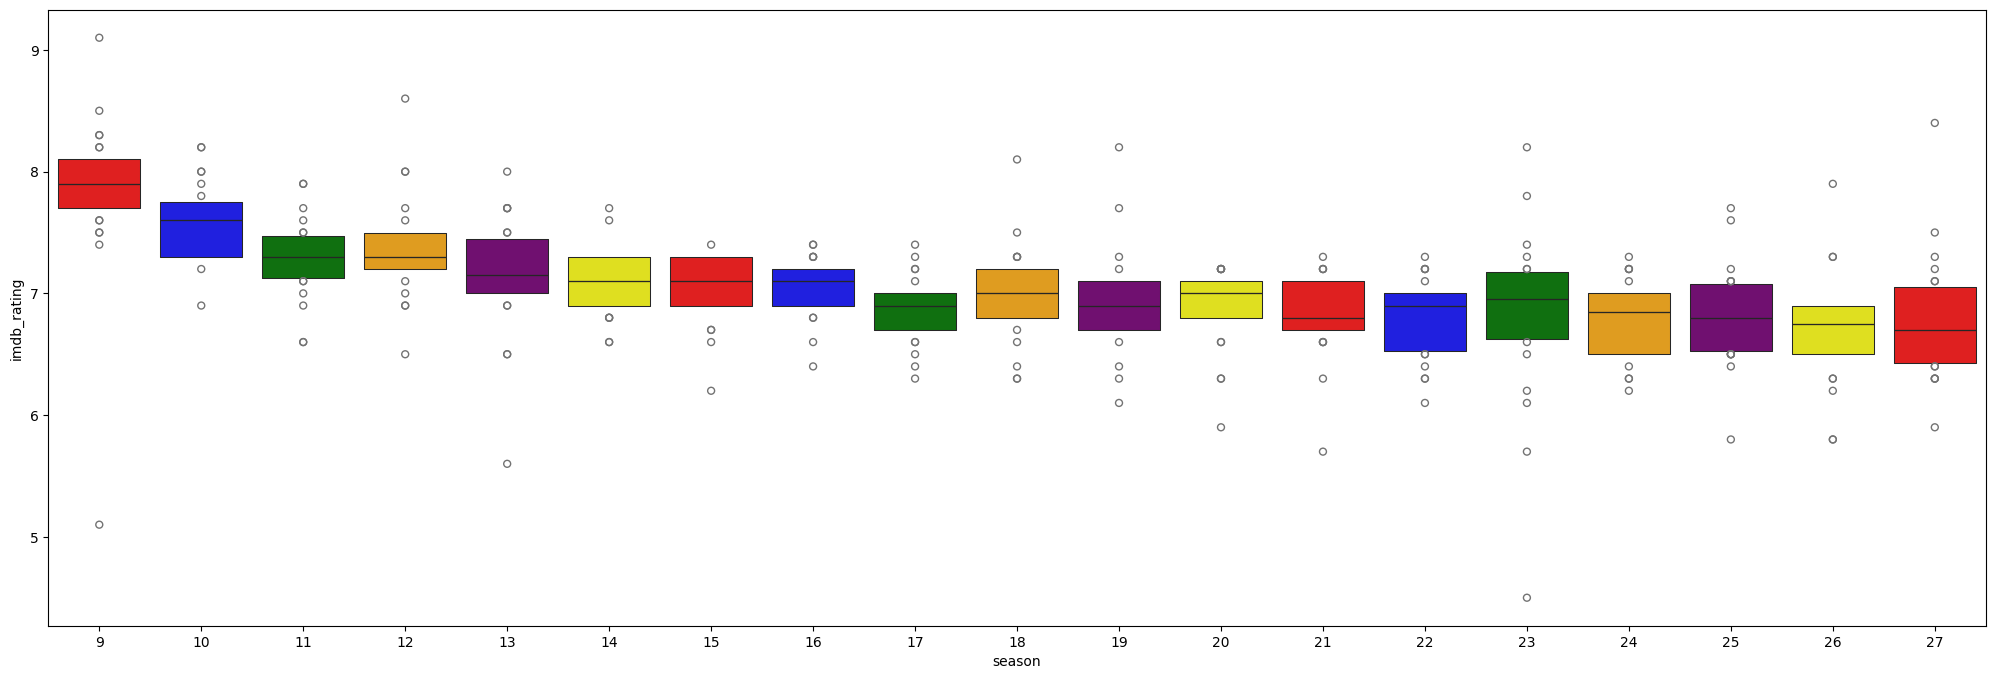

In [226]:
plt.figure(figsize=[25,8])
sns.boxenplot(data=peores_temp, x='season', y='imdb_rating', hue="season", palette=colores_personalizados, legend=False);

A pesar de que la media de valores esté en 7, hay algunos capítulos que sobrepasan el 8, incluso hay 1 capítulo
en la temporada 9 que obtiene un sobresaliente, siendo uno de los capítulos mejor valorado de la serie.

A continuación, me dispongo a averiguar los 5 mejores capítulos de los Simpsons:

In [227]:
media_votos = df_limpio.imdb_votes.mean()
visual_encima_media = df_limpio.views.mean()

In [278]:
visual_encima_media

48839.65546218488

In [229]:
votos_encima_media = df_limpio[(df_limpio['imdb_votes']>media_votos)&(df_limpio['views']>visual_encima_media)]

In [279]:
mejores_temp = votos_encima_media.groupby("season")['imdb_rating'].mean()

In [280]:
mejores_temp

season
1     7.807692
2     8.141176
3     8.205000
4     8.268182
5     8.336364
6     8.408333
7     8.324000
8     8.220000
9     8.300000
10    7.741667
11    7.900000
12    8.200000
23    8.200000
Name: imdb_rating, dtype: float64

In [231]:
votos_encima_media = votos_encima_media.sort_values(by='imdb_rating', ascending=False)

In [232]:
top_10_cap = votos_encima_media.iloc[0:10]

In [233]:
top_10_cap

,id,imdb_rating,imdb_votes,number_in_season,original_air_date,original_air_year,season,title,viewers,views
537,176,9.2,2256.0,23,1997-05-04,1997,8,Homer's Enemy,11.8,74177.0
535,155,9.2,2439.0,2,1996-11-03,1996,8,You Only Move Twice,13.9,79609.0
323,179,9.1,1918.0,1,1997-09-21,1997,9,The City of New York vs. Homer Simpson,10.5,62962.0
534,128,9.1,1619.0,25,1995-05-21,1995,6,Who Shot Mr. Burns? (Part One),15.0,86070.0
528,83,9.0,2010.0,2,1993-10-07,1993,5,Cape Feare,20.0,65585.0
284,135,9.0,1633.0,7,1995-11-05,1995,7,King-Size Homer,17.0,81426.0
533,109,9.0,1690.0,6,1994-10-30,1994,6,Treehouse of Horror V,22.2,119295.0
297,112,9.0,1655.0,9,1994-11-27,1994,6,Homer Badman,17.0,71577.0
261,76,9.0,1827.0,17,1993-03-11,1993,4,Last Exit to Springfield,22.4,71907.0
60,163,9.0,1793.0,10,1997-01-12,1997,8,The Springfield Files,20.9,69555.0


In [234]:
titulos_cap = top_10_cap[['title', 'imdb_rating', 'season']].sort_values('imdb_rating', ascending=False)

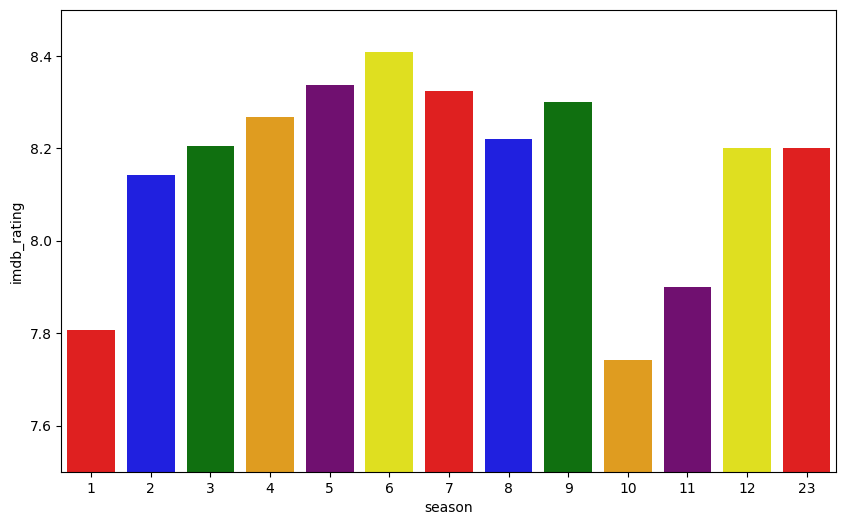

In [235]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(mejores_temp, palette=colores_personalizados, ax=ax)
ax.set(ylim=(7.5, 8.5))
plt.show()

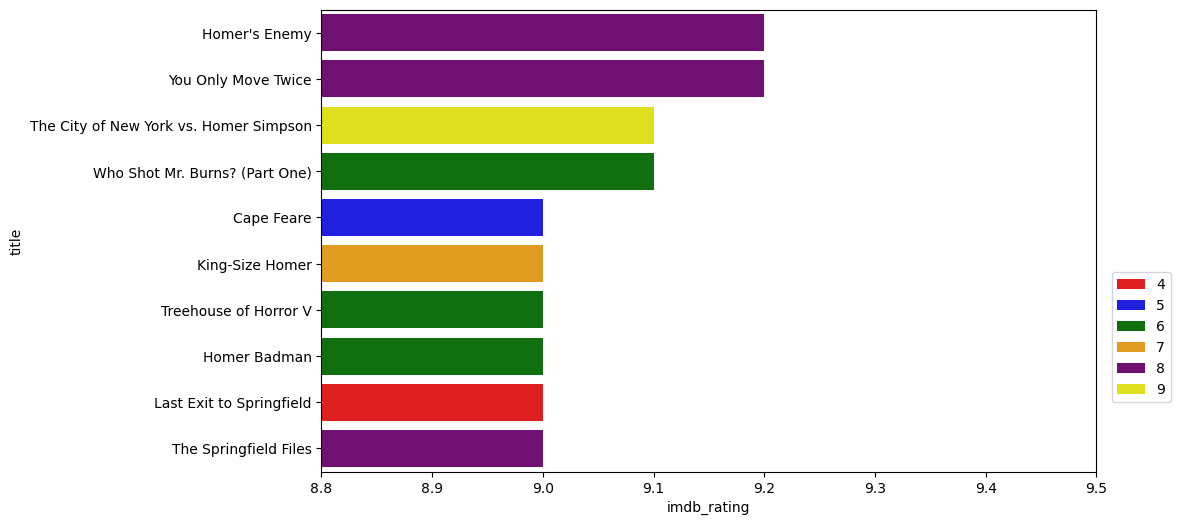

In [236]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(titulos_cap, y='title', x='imdb_rating', native_scale=True, hue='season', palette=colores_personalizados)
plt.legend (bbox_to_anchor = ( 1.02 , 0.15 ), loc = 'lower left', borderaxespad = 0 )


ax.set(xlim=(8.8, 9.5))
plt.show()

Procedo a dibujar una gráfica de barras con la información extraida

In [237]:
top_10_cap = top_10_cap.sort_values(by="season")

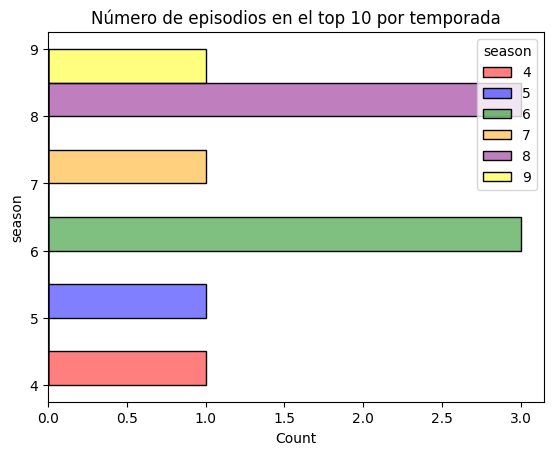

In [238]:
sns.histplot(data=top_10_cap, y="season", hue="season",
             bins=10, kde=True, palette=colores_personalizados)
plt.title("Número de episodios en el top 10 por temporada")
plt.show()

Finalmente, haciendo uso de dos datasets más (characters y string_lines), determinaré qué pesonajes tienen más peso en la serie y qué porcentaje de 
personajes femeninos y masculinos hay;

In [239]:
df_limpio

,id,imdb_rating,imdb_votes,number_in_season,original_air_date,original_air_year,season,title,viewers,views
0,10,7.4,1511.0,10,1990-03-25,1990,1,Homer's Night Out,30.30,50816.0
1,12,8.3,1716.0,12,1990-04-29,1990,1,Krusty Gets Busted,30.40,62561.0
2,14,8.2,1638.0,1,1990-10-11,1990,2,"Bart Gets an ""F""",33.60,59575.0
3,17,8.1,1457.0,4,1990-11-01,1990,2,Two Cars in Every Garage and Three Eyes on Eve...,26.10,64959.0
4,19,8.0,1366.0,6,1990-11-15,1990,2,Dead Putting Society,25.40,50691.0
...,...,...,...,...,...,...,...,...,...,...
595,500,7.0,580.0,14,2012-02-19,2012,23,At Long Last Leave,5.77,45226.0
596,502,7.3,541.0,16,2012-03-11,2012,23,How I Wet Your Mother,4.97,44818.0
597,511,6.9,460.0,3,2012-11-04,2012,24,Adventures in Baby-Getting,5.65,39687.0
598,542,6.4,473.0,12,2014-03-09,2014,25,Diggs,2.69,39292.0


In [240]:
df_script_lines = pd.read_csv("simpsons_script_lines.csv")

In [241]:
df_script_lines

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158266,9544,32,204,Miss Hoover: (OFF LISA'S REACTION) I'm back.,831000,true,464,3.0,Miss Hoover,Springfield Elementary School,I'm back.,im back,2
158267,9545,32,205,"Miss Hoover: You see, class, my Lyme disease t...",839000,true,464,3.0,Miss Hoover,Springfield Elementary School,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,10
158268,9546,32,206,Miss Hoover: Psy-cho-so-ma-tic.,842000,true,464,3.0,Miss Hoover,Springfield Elementary School,Psy-cho-so-ma-tic.,psy-cho-so-ma-tic,1
158269,9547,32,207,Ralph Wiggum: Does that mean you were crazy?,844000,true,119,3.0,Ralph Wiggum,Springfield Elementary School,Does that mean you were crazy?,does that mean you were crazy,6


In [242]:
df_script_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158271 non-null  int64  
 1   episode_id          158271 non-null  int64  
 2   number              158271 non-null  int64  
 3   raw_text            158271 non-null  object 
 4   timestamp_in_ms     158271 non-null  object 
 5   speaking_line       158271 non-null  object 
 6   character_id        140750 non-null  object 
 7   location_id         157864 non-null  float64
 8   raw_character_text  140749 non-null  object 
 9   raw_location_text   157863 non-null  object 
 10  spoken_words        132112 non-null  object 
 11  normalized_text     132087 non-null  object 
 12  word_count          132112 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 15.7+ MB


In [243]:
df_script_lines = df_script_lines.dropna(subset=["character_id", "location_id", "raw_character_text", "raw_location_text", "spoken_words", "normalized_text", "word_count"])

In [244]:
len(df_script_lines.columns)

13

In [245]:
len(df_limpio.columns)

10

In [246]:
merged_1_df = pd.merge(left=df_limpio, right=df_script_lines, left_on="id", right_on="episode_id", how="left")

In [247]:
merged_1_df

,id_x,imdb_rating,imdb_votes,number_in_season,original_air_date,original_air_year,season,title,viewers,views,...,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,10,7.4,1511.0,10,1990-03-25,1990,1,Homer's Night Out,30.30,50816.0,...,"Eugene Fisk: I love you, Dad.",333000,true,169,154.0,Eugene Fisk,PARTY ROOM,"I love you, Dad.",i love you dad,4
1,10,7.4,1511.0,10,1990-03-25,1990,1,Homer's Night Out,30.30,50816.0,...,"Mr. Fisk: I love you, son.",335000,true,168,154.0,Mr. Fisk,PARTY ROOM,"I love you, son.",i love you son,4
2,10,7.4,1511.0,10,1990-03-25,1990,1,Homer's Night Out,30.30,50816.0,...,Marge Simpson: So how was the office birthday ...,97000,true,1,91.0,Marge Simpson,Simpson Bathroom,So how was the office birthday party?,so how was the office birthday party,7
3,10,7.4,1511.0,10,1990-03-25,1990,1,Homer's Night Out,30.30,50816.0,...,"Homer Simpson: Oh, it was delightful. The fros...",100000,true,2,91.0,Homer Simpson,Simpson Bathroom,"Oh, it was delightful. The frosting on the cak...",oh it was delightful the frosting on the cake ...,46
4,10,7.4,1511.0,10,1990-03-25,1990,1,Homer's Night Out,30.30,50816.0,...,Marge Simpson: Does this girl like him?,115000,true,1,91.0,Marge Simpson,Simpson Bathroom,Does this girl like him?,does this girl like him,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131735,548,7.0,504.0,18,2014-04-13,2014,25,Days of Future Future,3.64,55742.0,...,"Adult Bart: So, you're sure I'm cured? No more...",1161000,true,8,4343.0,Adult Bart,INDUSTRIAL SPACE,"So, you're sure I'm cured? No more feelings fo...",so youre sure im cured no more feelings for my...,11
131736,548,7.0,504.0,18,2014-04-13,2014,25,Days of Future Future,3.64,55742.0,...,"Adult Bart: Lis, I hope things work out with y...",1205000,true,8,5.0,Adult Bart,Simpson Home,"Lis, I hope things work out with you and Milho...",lis i hope things work out with you and milhou...,21
131737,548,7.0,504.0,18,2014-04-13,2014,25,Days of Future Future,3.64,55742.0,...,Adult Bart: Even though he's not a zombie anym...,1214000,true,8,5.0,Adult Bart,Simpson Home,Even though he's not a zombie anymore?,even though hes not a zombie anymore,7
131738,548,7.0,504.0,18,2014-04-13,2014,25,Days of Future Future,3.64,55742.0,...,Adult Lisa: (MILDLY IRRITATED) As I told you w...,332000,true,9,5.0,Adult Lisa,Simpson Home,"As I told you when we talked last month, I've ...",as i told you when we talked last month ive be...,20


In [248]:
df_characters = pd.read_csv("simpsons_characters.csv")

In [249]:
df_characters

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


In [250]:
[df_characters["gender"].isna().sum()]

[6399]

In [251]:
df_characters[(df_characters["gender"] == "f") | (df_characters["gender"] == "m")]

,id,name,normalized_name,gender
70,1,Marge Simpson,marge simpson,f
71,8,Bart Simpson,bart simpson,m
72,9,Lisa Simpson,lisa simpson,f
73,17,Moe Szyslak,moe szyslak,m
74,3,Seymour Skinner,seymour skinner,m
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


In [252]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6722 non-null   int64 
 1   name             6722 non-null   object
 2   normalized_name  6722 non-null   object
 3   gender           323 non-null    object
dtypes: int64(1), object(3)
memory usage: 210.2+ KB


In [253]:
df_characters= df_characters.dropna(subset=["gender"])   

In [254]:
df_characters

,id,name,normalized_name,gender
70,1,Marge Simpson,marge simpson,f
71,8,Bart Simpson,bart simpson,m
72,9,Lisa Simpson,lisa simpson,f
73,17,Moe Szyslak,moe szyslak,m
74,3,Seymour Skinner,seymour skinner,m
...,...,...,...,...
6717,5222,Ron Rabinowitz,ron rabinowitz,m
6718,5728,Martha Stewart,martha stewart,f
6719,1770,Officer Goodman,officer goodman,m
6720,1634,Evan Conover,evan conover,m


A pesar de que faltan muchos géneros, he decidido conservar la columna, ya que veo que los personajes que carecen del mismo son secundarios, y quiero utilizar dicha variable a lo largo de mi análisis.

In [255]:
merged_1_df.dropna(inplace=True) 

In [256]:
merged_1_df["character_id"] = merged_1_df["character_id"].fillna(-1).astype("int64")

In [257]:
merge_df_final = pd.merge(left=merged_1_df, right=df_characters, left_on="character_id", right_on="id", how="left")

In [258]:
merge_df_final.columns

Index(['id_x', 'imdb_rating', 'imdb_votes', 'number_in_season',
       'original_air_date', 'original_air_year', 'season', 'title', 'viewers',
       'views', 'id_y', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count',
       'id', 'name', 'normalized_name', 'gender'],
      dtype='object')

Ya tengo todos los 3 datasets que necesito unidos para continuar con el análisis.


In [259]:
merge_df_final["word_count"].dtype

dtype('O')

In [260]:
merge_df_final["word_count"] = pd.to_numeric(merge_df_final["word_count"], errors="coerce")

In [261]:
merge_df_final["word_count"] = merge_df_final["word_count"].astype("object")

In [262]:
df_count_word = merge_df_final.copy()
df_count_word["conteo"] = df_count_word["normalized_text"].apply(lambda word: word.split(" "))
df_count_word["conteo"] = df_count_word["conteo"].apply(lambda word: len(word))


In [263]:
protas = pd.DataFrame(df_count_word.groupby(["name"])["conteo"].sum())
protas = protas.sort_values("conteo", ascending=False)
protas

,conteo
name,
Homer Simpson,273274
Marge Simpson,125409
Bart Simpson,110723
Lisa Simpson,100477
C. Montgomery Burns,36623
...,...
Johnny Tightlips,227
Ted Nugent,227
Agent Johnson,226


In [264]:
protas.head(10)

,conteo
name,
Homer Simpson,273274
Marge Simpson,125409
Bart Simpson,110723
Lisa Simpson,100477
C. Montgomery Burns,36623
Moe Szyslak,32836
Seymour Skinner,28069
Ned Flanders,22880
Krusty the Clown,20631


Como tod@s sospechábamos, Homer es el claro protagonista de la serie, con más del doble de líneas de guión que Marge, en el 
2º lugar.
Podemos ver que, de los 10 protagonistas, tan solo 2 son personajes femeninos, y son integrantes de la familia.
Como actores secundarios, vemos que, de entre los 6 primeros todos ellos son personajes masculinos.
El nº 1 es el señor Burns, destacando el papel del jefe por encima de cualquier otro en la vida de
esta familia.

In [265]:
gráfica_protas = protas.iloc[0:11]

In [266]:
gráfica_protas

,conteo
name,
Homer Simpson,273274
Marge Simpson,125409
Bart Simpson,110723
Lisa Simpson,100477
C. Montgomery Burns,36623
Moe Szyslak,32836
Seymour Skinner,28069
Ned Flanders,22880
Krusty the Clown,20631


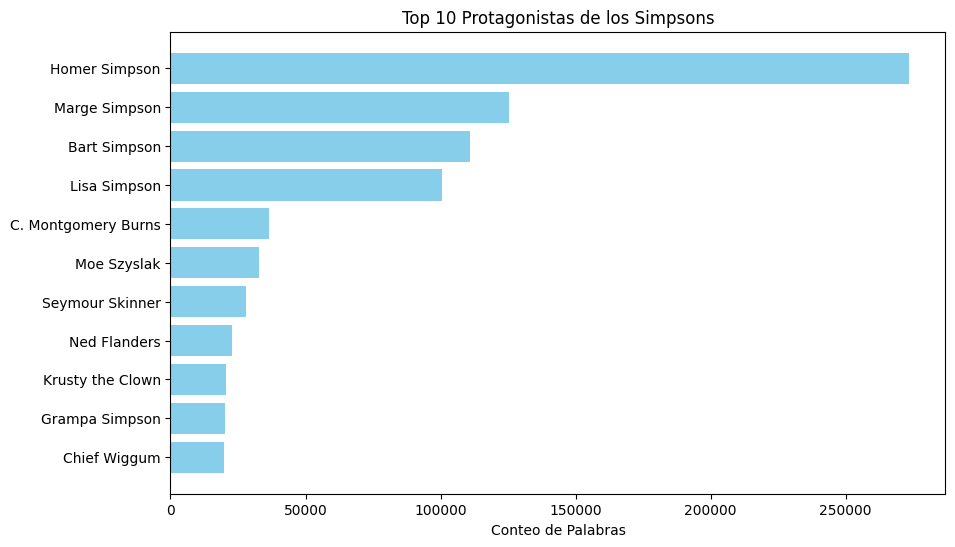

In [267]:
plt.figure(figsize=(10, 6))
plt.barh(gráfica_protas.index, gráfica_protas.conteo, color='skyblue')
plt.xlabel('Conteo de Palabras')
plt.title('Top 10 Protagonistas de los Simpsons')
plt.gca().invert_yaxis()  # Invertir el eje "y" para que el personaje con más palabras esté en la parte superior


In [268]:
total_palabras = df_count_word["conteo"].sum()
total_palabras

1302073

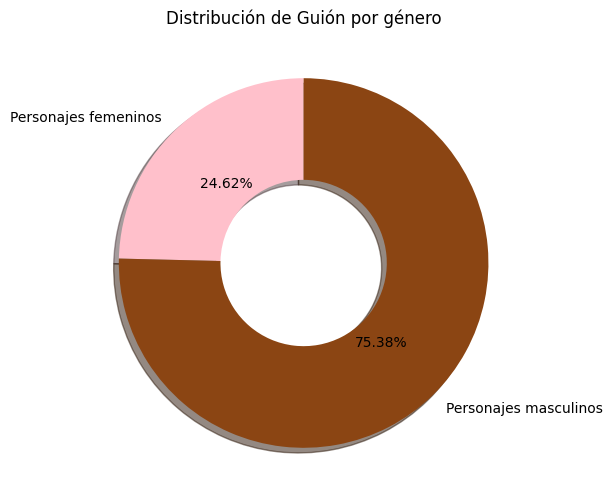

In [269]:
# Calculo el porcentaje de guión que tienen los hombres y las mujeres
total_palabras = df_count_word["conteo"].sum()
porcentaje_mujeres = df_count_word[df_count_word["gender"] == "f"]["conteo"].sum() / total_palabras
porcentaje_hombres = df_count_word[df_count_word["gender"] == "m"]["conteo"].sum() / total_palabras

# A continuación, creo una lista con los porcentajes y etiquetas.
porcentajes = [porcentaje_mujeres, porcentaje_hombres]
etiquetas = ["Personajes femeninos", "Personajes masculinos"]

colores = ["pink", "saddlebrown"]

# Dibujo mi gráfica
plt.figure(figsize=(6, 6))
plt.pie(porcentajes, labels=etiquetas, autopct="%1.2f%%", startangle=90, wedgeprops=dict(width=0.55), colors=colores,shadow=True)

centro_circulo = plt.Circle((0, 0), 0.3, color="white")
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title("Distribución de Guión por género");

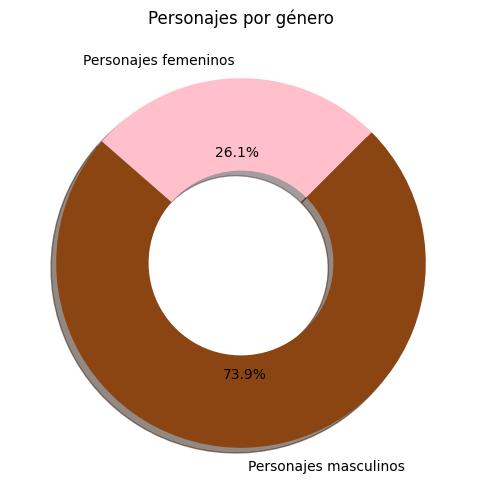

In [270]:
conteo_genero = df_count_word["gender"].value_counts()
num_mujeres = conteo_genero["f"] if "f" in conteo_genero else 0
num_hombres = conteo_genero["m"] if "m" in conteo_genero else 0

conteo = [num_mujeres, num_hombres]
etiquetas = ["Personajes femeninos", "Personajes masculinos"]

colores = ["pink", "saddlebrown"]

plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=etiquetas, autopct="%1.1f%%", startangle=45, wedgeprops=dict(width=0.5), colors=colores, shadow=True)

centro_circulo = plt.Circle((0, 0), 0.3, color="white")
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title("Personajes por género");
